<a href="https://colab.research.google.com/github/Srinithimahalakshmi/Data_science/blob/main/TASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes.csv


In [5]:
df=pd.read_csv("/content/diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
outcome,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [18]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=df[features]
Y=df['outcome']

In [19]:
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.2,random_state=42)


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
model=LogisticRegression(max_iter=2000, solver='lbfgs')
model.fit(X,Y)

LogisticRegression(max_iter=2000)

In [23]:
Y_pred=model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
accuracy=accuracy_score(Y_test,Y_pred)
classification_report=classification_report(Y_test,Y_pred)

In [25]:
print("accuracy:",accuracy)
print(classification_report)

accuracy: 0.7801302931596091
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       401
           1       0.74      0.56      0.64       213

    accuracy                           0.78       614
   macro avg       0.77      0.73      0.74       614
weighted avg       0.78      0.78      0.77       614



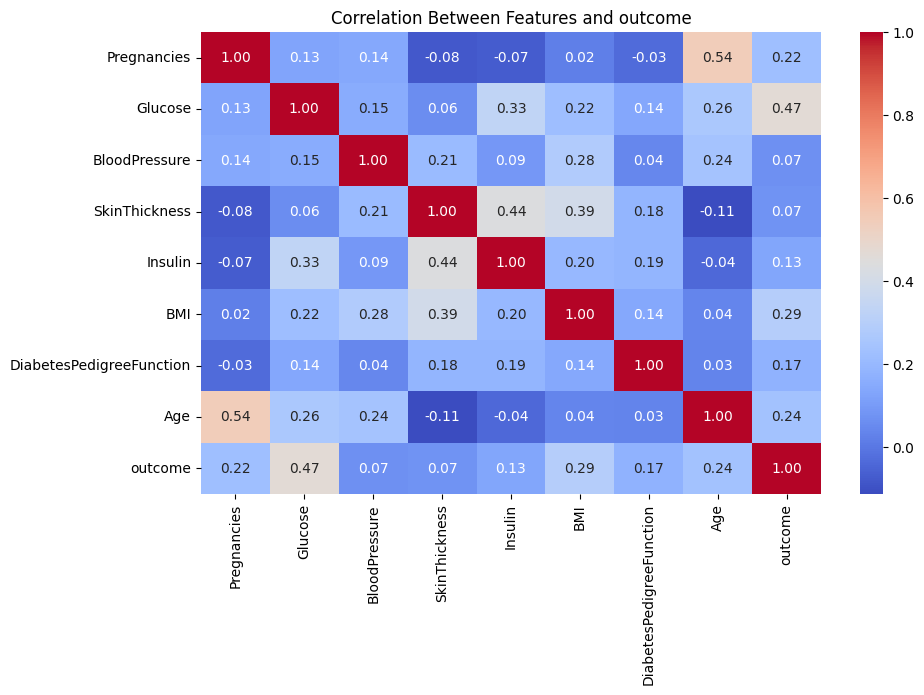

In [27]:
plt.figure(figsize=(10, 6))
corr = df[features + ["outcome"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features and outcome")
plt.show()

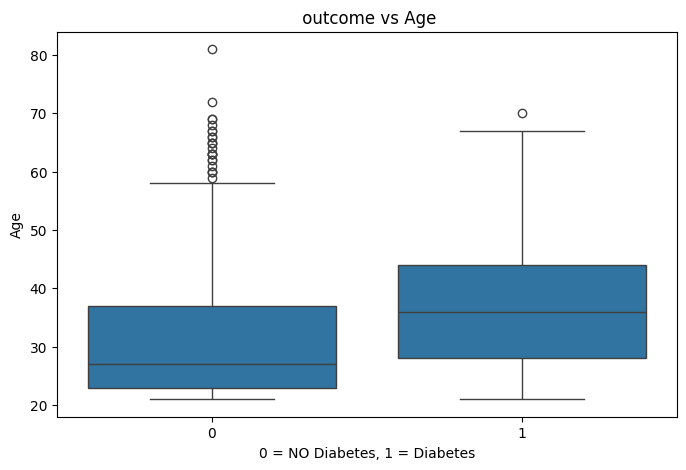

In [29]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="outcome", y="Age", data=df)
plt.title(" outcome vs Age")
plt.xlabel("0 = NO Diabetes, 1 = Diabetes")
plt.ylabel("Age")
plt.show()

In [35]:
input_data = pd.DataFrame([[6, 148, 72, 0, 33.6, 0, 627, 50]], columns=features)
prediction = model.predict(input_data)
print(prediction)

[1]
